In [ ]:
# Downgrade version of TensorFlow and tf-keras

!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 req

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

# Check TensorFlow version
print(tf.__version__)

2.15.1


In [2]:
model = load_model('/content/final_model.keras')

In [3]:
# Mapping class label
class_dict = {'dry': 0, 'normal': 1, 'oily': 2}
label_lookup = {v: k for k, v in class_dict.items()}
img_height = 224
img_width = 224

# Create a function for test a new image
def prediction(file):
    img = tf.keras.utils.load_img(file, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    x = tf.keras.utils.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)

    pred_proba = model.predict(x)
    pred_class = np.argmax(pred_proba[0])
    pred_label = label_lookup[pred_class]

    print(f"Prediction: {pred_label} (confidence: {pred_proba[0][pred_class]:.2f})")


In [4]:
!wget "https://theglowmemo.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_620/MjAxNTAwMDkyMDM1NzY5OTA5/how-to-get-rid-of-oily-skin-2200x1230.jpg" -O image_inference.jpg


--2025-07-01 12:10:39--  https://theglowmemo.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_620/MjAxNTAwMDkyMDM1NzY5OTA5/how-to-get-rid-of-oily-skin-2200x1230.jpg
Resolving theglowmemo.com (theglowmemo.com)... 151.101.2.98, 151.101.194.98, 151.101.66.98, ...
Connecting to theglowmemo.com (theglowmemo.com)|151.101.2.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29878 (29K) [image/jpeg]
Saving to: ‘image_inference.jpg’

image_inference.jpg 100%[===================>]  29.18K  --.-KB/s    in 0.003s  

2025-07-01 12:10:39 (9.92 MB/s) - ‘image_inference.jpg’ saved [29878/29878]



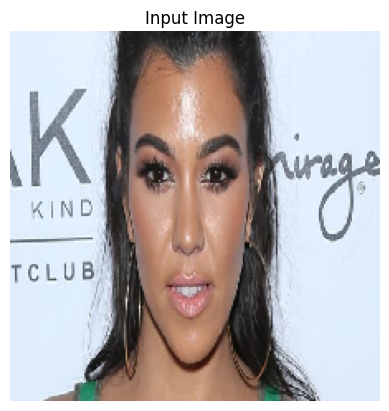

1/1 [==============================] - 0s 264ms/step
Prediction: normal (confidence: 0.42)


In [5]:
prediction('image_inference.jpg')



In [6]:
!wget "https://awsimages.detik.net.id/community/media/visual/2021/02/22/artis-korea-tanpa-makeup-9.jpeg?w=600&q=90" -O image_inference1.jpg


--2025-07-01 12:10:54--  https://awsimages.detik.net.id/community/media/visual/2021/02/22/artis-korea-tanpa-makeup-9.jpeg?w=600&q=90
Resolving awsimages.detik.net.id (awsimages.detik.net.id)... 203.190.242.102, 103.49.221.102
Connecting to awsimages.detik.net.id (awsimages.detik.net.id)|203.190.242.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54961 (54K) [image/jpeg]
Saving to: ‘image_inference1.jpg’

image_inference1.jp 100%[===================>]  53.67K   120KB/s    in 0.4s    

2025-07-01 12:10:56 (120 KB/s) - ‘image_inference1.jpg’ saved [54961/54961]



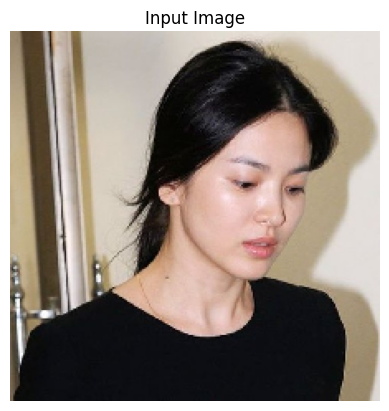

1/1 [==============================] - 0s 54ms/step
Prediction: oily (confidence: 0.35)


In [7]:
prediction('image_inference1.jpg')


In [8]:
!wget "https://au.balibodyco.com/cdn/shop/articles/Screenshot_2023-08-31_at_2.45.49_pm.png?v=1693457400&width=1100" -O image_inference2.jpg


--2025-07-01 12:11:04--  https://au.balibodyco.com/cdn/shop/articles/Screenshot_2023-08-31_at_2.45.49_pm.png?v=1693457400&width=1100
Resolving au.balibodyco.com (au.balibodyco.com)... 23.227.38.74, 2620:127:f00f:e::
Connecting to au.balibodyco.com (au.balibodyco.com)|23.227.38.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561868 (1.5M) [image/png]
Saving to: ‘image_inference2.jpg’

image_inference2.jp 100%[===================>]   1.49M  --.-KB/s    in 0.07s   

2025-07-01 12:11:05 (20.5 MB/s) - ‘image_inference2.jpg’ saved [1561868/1561868]



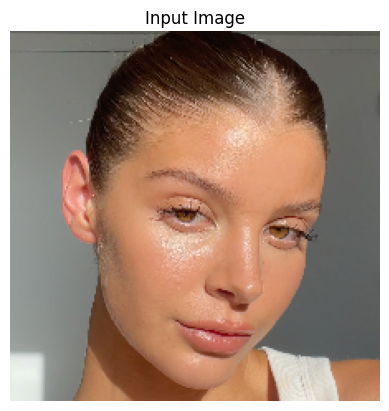

1/1 [==============================] - 0s 60ms/step
Prediction: oily (confidence: 0.44)


In [9]:
prediction('image_inference2.jpg')
